In [6]:
import cv2
import numpy as np

In [7]:
img0 = np.array([[0,0,1], [0,1,0], [1, 0, 0]])

In [8]:
print(img0)

[[0 0 1]
 [0 1 0]
 [1 0 0]]


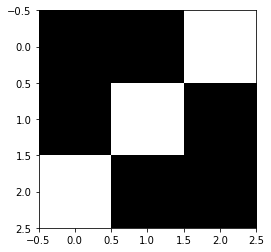

In [9]:
import matplotlib.pyplot as plt
plt.imshow(img0, cmap = 'gray')

True
(480, 640, 3)


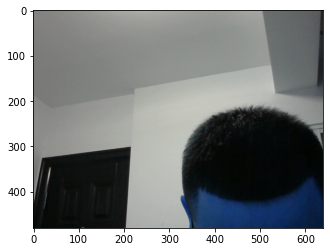

In [27]:
cap = cv2.VideoCapture(0)
print(cap.isOpened())

(480, 640, 3)


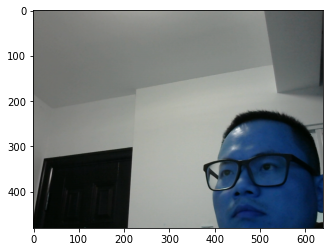

In [29]:
return_value,frame=cap.read()
print(frame.shape)
plt.imshow(frame)

True
True
(480, 640, 3)
4


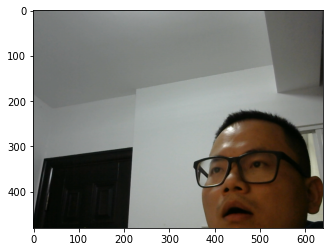

In [32]:
print(cap.isOpened())
for i in range(101):
    return_value,frame = cap.read()
print(return_value)
print(frame.shape)
print(cv2.COLOR_BGR2RGB)

plt.imshow( cv2.cvtColor(frame, 4))
# R G B 
# B G R 

#plt.imshow(frame)

In [33]:
cap.release()

In [34]:
img  = cv2.imread("lena.jpg")

#cv2.cvtColor()
#cv2.COLOR_BGR2RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [35]:
print(img.shape)

(722, 726, 3)


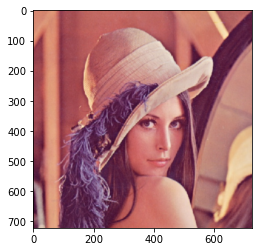

In [36]:
plt.imshow(img)

In [37]:
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(722, 726)

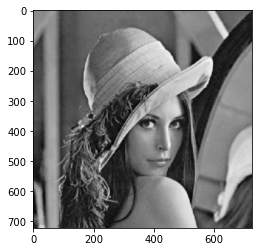

In [38]:
plt.imshow(img_gray,cmap='gray')

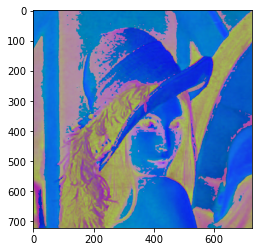

In [39]:
import cv2
img_BGR = cv2.imread('lena.jpg')
img_hsv=cv2.cvtColor(img_BGR,cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

In [40]:
# 二值化
import cv2
img =  cv2.imread('lena.jpg')

(30, 50, 3)

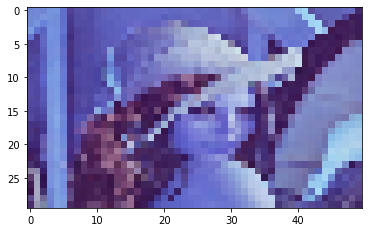

In [42]:
# 列，行
img =cv2.resize(img,(50,30))
plt.imshow(img)
img.shape


(722, 726, 3)
(2000, 1000, 3)


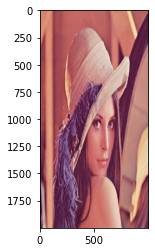

In [43]:
# 列，行
img =  cv2.imread('lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
img =cv2.resize(img,(1000,2000))
plt.imshow(img)
print(img.shape)

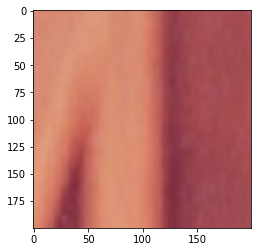

In [44]:
# roi
img_roi =img[100:300,0:200]
plt.imshow(img_roi)

(722, 726, 3)


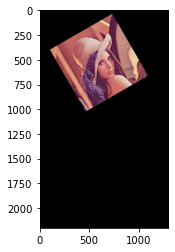

In [46]:
import numpy as np
# 移动：
#M = np.float32([[2,-0.1,300],[0.2,1,400]])
theta = -30/180*3.14
M = np.float32([[np.cos(theta),-np.sin(theta),100],[np.sin(theta),np.cos(theta),400]])

# 列，行
img =  cv2.imread('lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
print(img.shape)
#print(img[0+50,0])
img_1=cv2.warpAffine(img,M,(1300,2200))

plt.imshow(img_1)
#print(img_1[200+50,300])


[[  1.26666667   0.6        -83.33333333]
 [  0.           1.33333333 -16.66666667]]


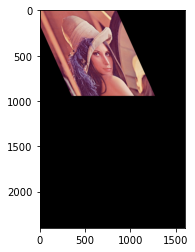

In [47]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,50],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
print(M)
#180/3.14
theta=-0.4
#M = np.float32([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0]])
#M = np.float32([[0.1,1,0],[0,0.1,0]])
# 变换矩阵，平移，斜切，旋转
# affine
cols=800
rows=800
dst = cv2.warpAffine(img,M,(cols*2,rows*3))
plt.imshow(dst)

[[ 6.25067088e-02  5.43536598e-03 -3.85367448e+00]
 [-9.16954863e-03  7.88759621e-02 -4.61344281e+00]
 [-2.15854629e-03 -2.18089059e-04  1.00000000e+00]]


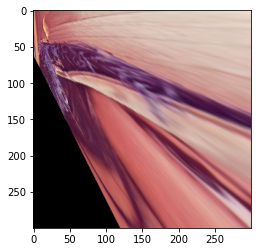

In [48]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[100,-20],[0,30],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)
# 拉伸变换后者透视变换
dst = cv2.warpPerspective(img,M,(300,300))
plt.imshow(dst)

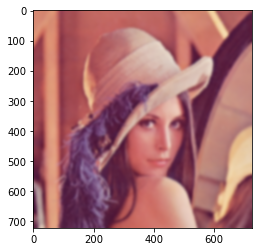

In [49]:
img = cv2.imread("lena.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gb= cv2.GaussianBlur(img, (139, 139), 4, 0)  # 高斯模糊
plt.imshow(img_gb)
# GaussianBlur（src，ksize，sigmaX [，dst [，sigmaY [，borderType]]]


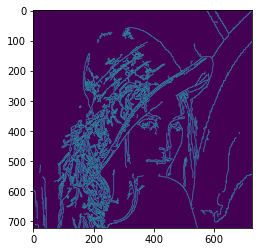

In [50]:
img_cn=cv2.Canny(img,30,150)
plt.imshow(img_cn)

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


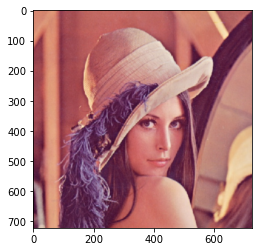

In [51]:
kernel = np.ones((3,3),np.float32)/(9)
##kernel=-kernel
kernel[0,:]=[-1,-1,-1]
kernel[1,:]=[0,0,0]
kernel[2,:]=[1,1,1]


print(kernel)
plt.imshow(img)

(722, 726, 3)
[0 0 0]


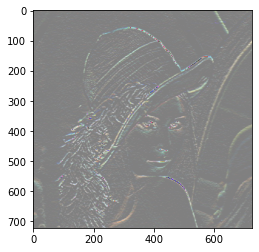

In [52]:
#dst=cv.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])；当ddepth=-1时，表示输出图像与原图像有相同的深度。
print(img.shape)
result = cv2.filter2D(img,-1,kernel)
result.shape
print(result[0,0])
plt.imshow(result+128)

(722, 726, 3)

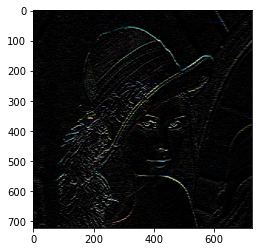

In [53]:
result = cv2.filter2D(result,-1,kernel)

plt.imshow(result)
result.shape

(300, 300, 3)


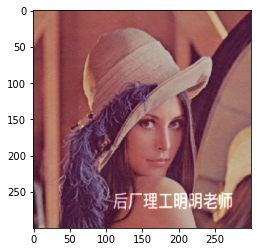

In [54]:
wm = cv2.imread("water1.png")
wm = cv2.resize(wm,(300,300))
wm = 255-wm
img1 = cv2.resize(img,(300,300))
#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
print(wm.shape)
#plt.imshow(cv2.add(wm,img1))
#0.8*wm + 0.9*img1

plt.imshow(cv2.addWeighted(wm,0.9,img1,0.8,0))


#plt.imshow(wm)